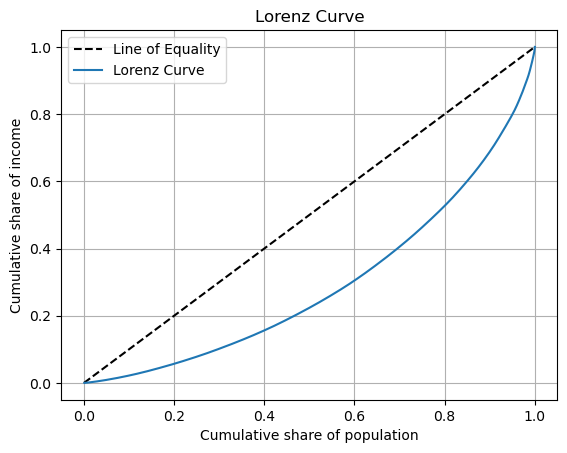

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample distribution of income
income = np.random.lognormal(mean=1.5, sigma=0.75, size=1000)

# Sort the income from lowest to highest
income_sorted = np.sort(income)

# Calculate the cumulative share of income
cumulative_income_share = np.cumsum(income_sorted) / np.sum(income_sorted)

# Calculate the cumulative share of population
cumulative_population_share = np.arange(1, len(income) + 1) / len(income)

# Plot the line of equality
plt.plot([0, 1], [0, 1], 'k--', label='Line of Equality')

# Plot the Lorenz curve
plt.plot(cumulative_population_share, cumulative_income_share, label='Lorenz Curve')

# Labeling the plot
plt.xlabel('Cumulative share of population')
plt.ylabel('Cumulative share of income')
plt.title('Lorenz Curve')
plt.legend()
plt.grid(True)
plt.show()


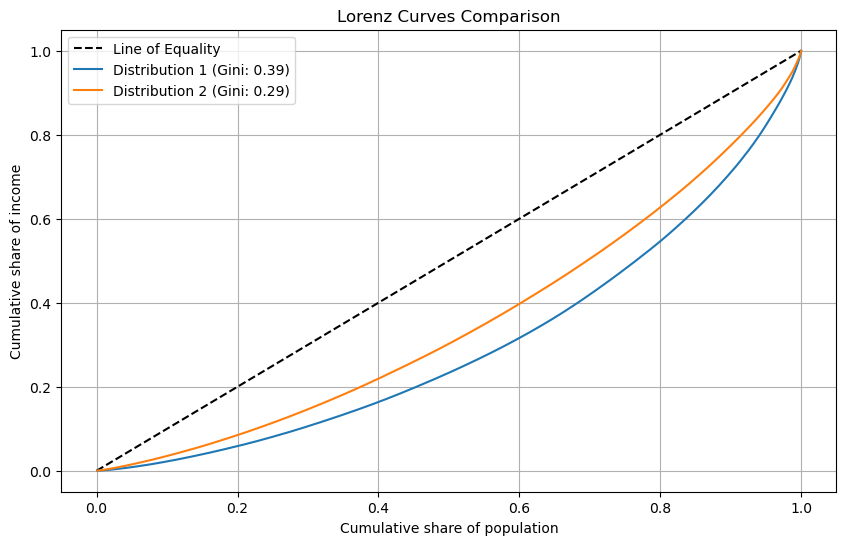

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

def calculate_lorenz_curve(income):
    """Calculate the points of the Lorenz curve for a given income distribution."""
    income_sorted = np.sort(income)
    cumulative_income_share = np.cumsum(income_sorted) / np.sum(income_sorted)
    cumulative_population_share = np.arange(1, len(income) + 1) / len(income)
    return cumulative_population_share, cumulative_income_share

def calculate_gini_coefficient(lorenz_curve):
    """Calculate the Gini coefficient from a Lorenz curve."""
    area_under_curve = trapz(lorenz_curve[1], lorenz_curve[0])
    area_between_curves = 0.5 - area_under_curve
    gini_coefficient = 2 * area_between_curves
    return gini_coefficient

# Generate two sample income distributions
income1 = np.random.lognormal(mean=1.5, sigma=0.75, size=1000)
income2 = np.random.lognormal(mean=1.2, sigma=0.5, size=1000)

# Calculate Lorenz curves
lorenz_curve1 = calculate_lorenz_curve(income1)
lorenz_curve2 = calculate_lorenz_curve(income2)

# Calculate Gini coefficients
gini_coefficient1 = calculate_gini_coefficient(lorenz_curve1)
gini_coefficient2 = calculate_gini_coefficient(lorenz_curve2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Line of Equality')  # Line of equality
plt.plot(lorenz_curve1[0], lorenz_curve1[1], label=f'Distribution 1 (Gini: {gini_coefficient1:.2f})')
plt.plot(lorenz_curve2[0], lorenz_curve2[1], label=f'Distribution 2 (Gini: {gini_coefficient2:.2f})')
plt.xlabel('Cumulative share of population')
plt.ylabel('Cumulative share of income')
plt.title('Lorenz Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()
